# Homework 5

We will use a dataset of CUNY fall enrollments from 1990 - 2019 from New York State open data.

The original dataset is here: [https://data.ny.gov/Education/City-University-of-New-York-CUNY-University-Enroll/366h-mnau](https://data.ny.gov/Education/City-University-of-New-York-CUNY-University-Enroll/366h-mnau)

To download:
1. click "View Data" in the upper right.
2. click "Export" in the upper right, and then click on "CSV" in the menu that appears.

Alternatively, a direct link to a download of the data is here: [https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/CUNY_Enrollment_Trends_Beginning_Fall_1990.csv](https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/CUNY_Enrollment_Trends_Beginning_Fall_1990.csv)

Remember all plots should have informative axis labels and a title.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)

### Question 0: Loading the two data sets

a) Load the CUNY enrollment data into a DataFrame.

In [21]:
enrollment = pd.read_csv("https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/CUNY_Enrollment_Trends_Beginning_Fall_1990.csv")

b) As in Lab 5, load the FBI background check data into a second DataFrame and convert the `month` column into DateTime objects.

In [5]:
guns = pd.read_csv("https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv")
guns['month'] = pd.to_datetime(guns['month'])

### Question 1: Clean the CUNY data

In addition to the steps below, you can optionally rename the columns.

a) There are clearly duplicate rows in the CUNY data, since the first 3 rows are the identical and then the 4th and 5th rows are identical. Remove all duplicate rows.

In [22]:
enrollment = enrollment.drop_duplicates()

b) Make a column called `Year` that contains only the year from the `Fall Term` column (so removing "Fall ").  You can modify the `Fall Term` column to become this `year` column, if that is easier.

<details><summary>Hints:</summary>
1. There are multiple ways to make this `Year` column. If your first idea seems complicated, you may want to try to think of another, easier way.  
2. The `replace()` function from Section 4.2 of Lab 4 can also take a string of characters. ex. `df.replace("to_be_replaced","new_text")`
</details>

In [25]:
enrollment["Year"] = enrollment["Fall Term"].str.replace("Fall ","")
enrollment = enrollment.drop("Fall Term", 1)

<ipython-input-25-ae1f2f6885c8>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  enrollment = enrollment.drop("Fall Term", 1)


In [27]:
enrollment.head()

,Enrollment Type Code,Enrollment Type Description,Head Count,Full-time Equivalent (FTE) Enrollment,Year
0,1,Transfer,24150,NaN,2019
3,2,First-time Freshmen,40522,NaN,2019
6,3,Graduate,30162,20248.0,2019
9,4,Undergraduate,241080,184147.0,2019
12,5,Total,271242,204395.0,2019


### Question 2: Line plot of CUNY enrollments

Use the Seaborn package to plot the CUNY enrollments of transfer, first-time freshmen, graduate, undergraduate, and total students over time on the same plot.  That is, create one plot containing all 5 line graphs.

Use the `Head Count` column for the enrollment numbers.

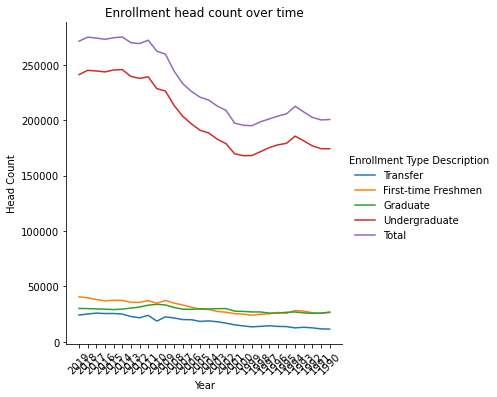

In [53]:
enrollment_plot = sns.relplot(x = "Year", y = "Head Count", hue = "Enrollment Type Description", kind = "line", data = enrollment)
enrollment_plot.set(xlabel = "Year", ylabel = "Head Count", title = "Enrollment head count over time")
plt.xticks(rotation=45)
enrollment_plot

c) What trends do you notice in the plot?

<b>Answer 2c:</b>  Total enrollment seems to be affected more by undergraduate enrollment than by the other types. Additionally, Undergradute enrollment is the only type that saw a noticeable decrease over the period.

### Question 3: Another line plot

With the total number of undergraduates so high compared to the number of transfer students and first-time freshmen, it is hard to see the variation in the number of enrollments.  

a) Make a new line plot with showing just the first-time freshmen and transfer enrollments over time.

In [51]:
not_ug_enrollment = enrollment[enrollment['Enrollment Type Code'] < 3]

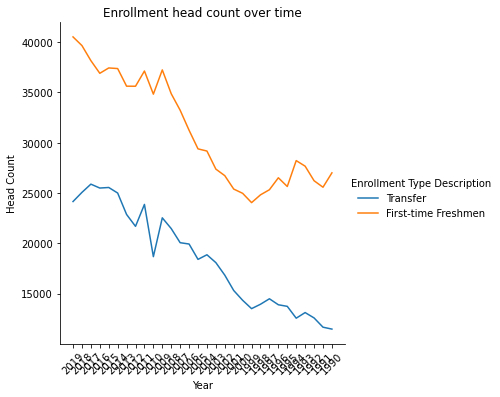

In [52]:
not_ug_enrollment_plot = sns.relplot(x = "Year", y = "Head Count", hue = "Enrollment Type Description", kind = "line", data = not_ug_enrollment)
not_ug_enrollment_plot.set(xlabel = "Year", ylabel = "Head Count", title = "Enrollment head count over time")
plt.xticks(rotation=45)
not_ug_enrollment_plot

b) What features can you see in the new graph that you could not in the previous one?

<b>Answer 3b:</b> All of the enrollment rates seem to increase over the period. In 1990, they were all below their levels in 2019. There was also a noticeable dip around 2010 for First-Time and Transfer studets.

### Question 4: Bar chart

a) Using Seaborn, plot a bar chart of the first-time freshmen and transfer students enrollments over the years.  That is, for each year, there will be two columns:  one showing the number of first-time freshmen and one showing the number of transfer students.

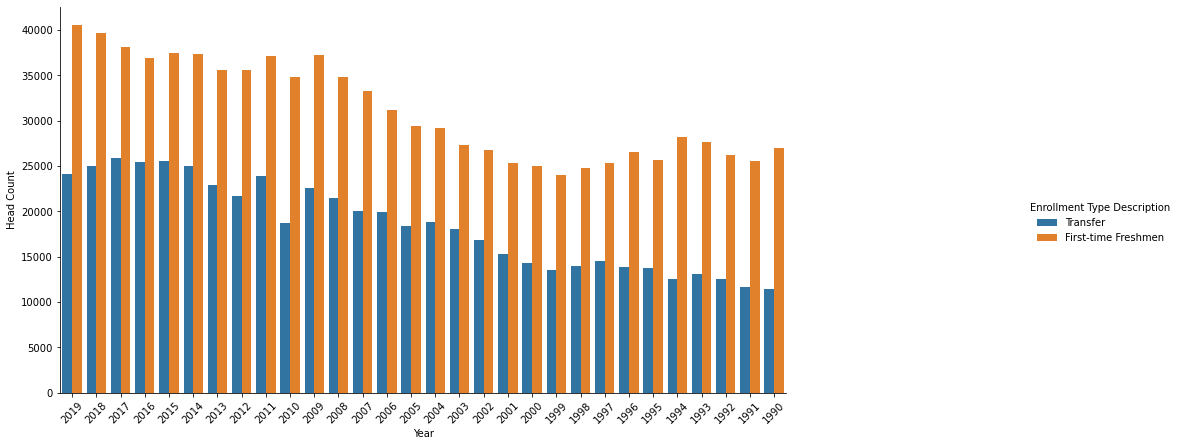

In [58]:
g=sns.catplot(x = "Year", y = "Head Count",hue = "Enrollment Type Description", kind = "bar", data = not_ug_enrollment)
plt.xticks(rotation=45)
g.fig.set_size_inches(18,6)
g

b) Which plot is the better visualization:  the line plot from question 3 or the bar plot from question 4?  Why?

<b>Answer 4b:</b> I believe that the time series is the best way to visualize this data. The bar plot is very noisy and does not add much to the analysis, whereas the time series is a straightforward way to communicate the trends in the data.

### Question 5

a) Using Seaborn, plot a scatterplot of the `Head Count` (on the x axis) versus `Full-time Equivalent (FTE) Enrollment` (on the y axis) columns for the undergraduate and graduate students, colored by whether the points correspond to undergraduate or graduate student data.

In [62]:
ug_g_enrollment = enrollment[enrollment['Enrollment Type Code'] != 1]
ug_g_enrollment = ug_g_enrollment[ug_g_enrollment['Enrollment Type Code'] != 5]
ug_g_enrollment = ug_g_enrollment[ug_g_enrollment['Enrollment Type Code'] != 2]

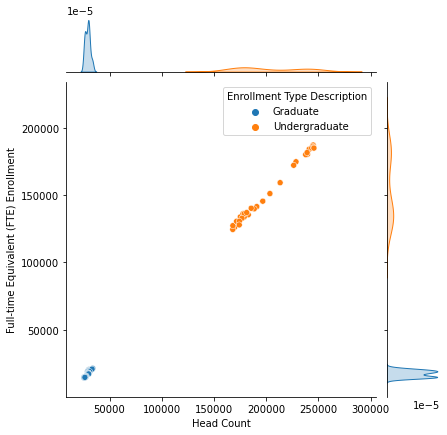

In [66]:
sns.jointplot(x = "Head Count", y = "Full-time Equivalent (FTE) Enrollment", hue="Enrollment Type Description", data = ug_g_enrollment)

b) What do you notice about the plot?  How informative is it?

<b>Answer 5b:</b> The first thing I notice is that the graduates and undergraduates are clearly in two different clusters. The undergraduate students have a larger headcount and account for larger FTE values, whereas the graduate students are the opposite.

### Bonus Question:

Suppose in Question 5 we are trying to compare the head count vs. full-time equivalent enrollment relationship between undergraduates and graduates.  For example, the two measures appear very correlated for both undergraduates and graduates, but is the correlation the same?  That is, do the best fit lines have the same slope?  Right now, it is hard to tell because there are so many more undergraduate students that graduate students. How could we plot the data to better visualize these correlations and compare them?

You can either code up such a plot(s) or give a written explanation.